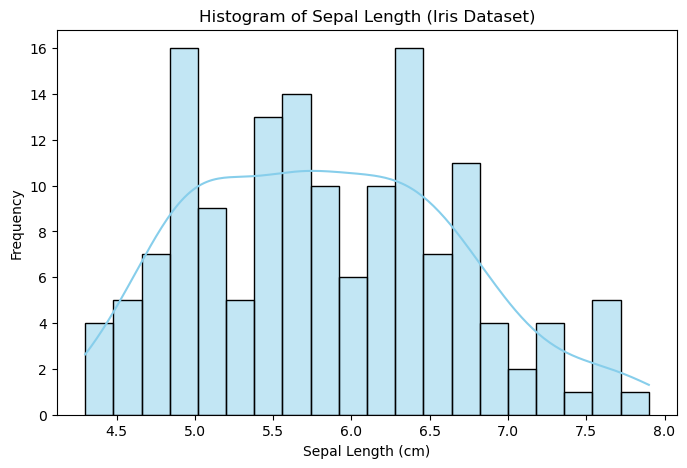

In [2]:
# Program 1

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

plt.figure(figsize=(8, 5))
sns.histplot(df['sepal length (cm)'], bins=20, color='skyblue', kde=True)
plt.title('Histogram of Sepal Length (Iris Dataset)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()


In [6]:
#program 2

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import os
os.environ["OMP_NUM_THREADS"] = "1"

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x75a796dea980>
Traceback (most recent call last):
  File "/home/ksb/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/ksb/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ksb/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/ksb/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'split

Accuracy: 0.9473684210526315

Confusion Matrix:
 [[40  3]
 [ 3 68]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



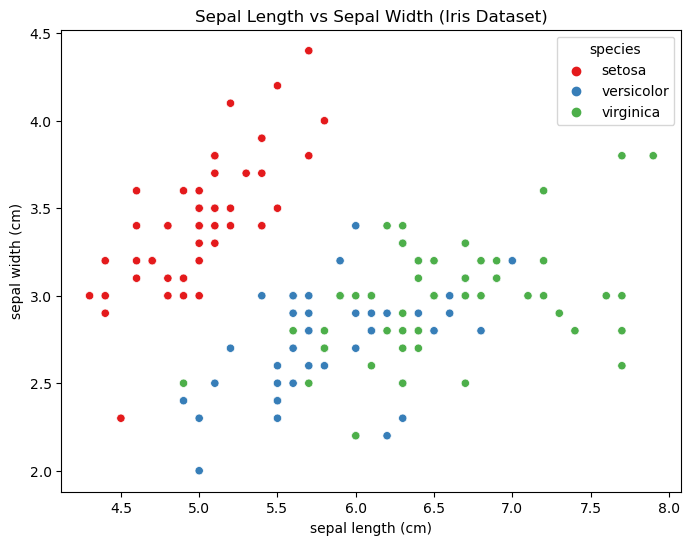

In [7]:
#program 3

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='species', palette='Set1')
plt.title('Sepal Length vs Sepal Width (Iris Dataset)')
plt.show()


In [8]:
#program 4

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



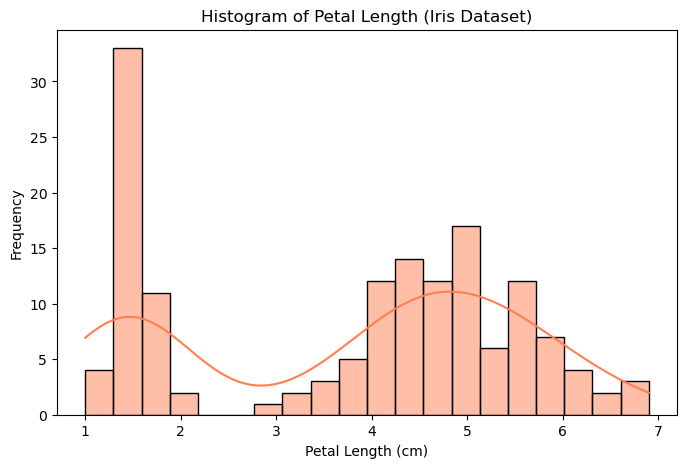

In [9]:
#program 5

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

plt.figure(figsize=(8,5))
sns.histplot(df['petal length (cm)'], bins=20, color='coral', kde=True)
plt.title('Histogram of Petal Length (Iris Dataset)')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.show()


In [10]:
#program 6

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
data = pd.read_csv(url)

X = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = data['charges']

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'), ['sex', 'smoker', 'region'])], remainder='passthrough')
X = ct.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)


Mean Squared Error: 33596915.85136147
Root Mean Squared Error: 5796.2846592762735
R² Score: 0.7835929767120723


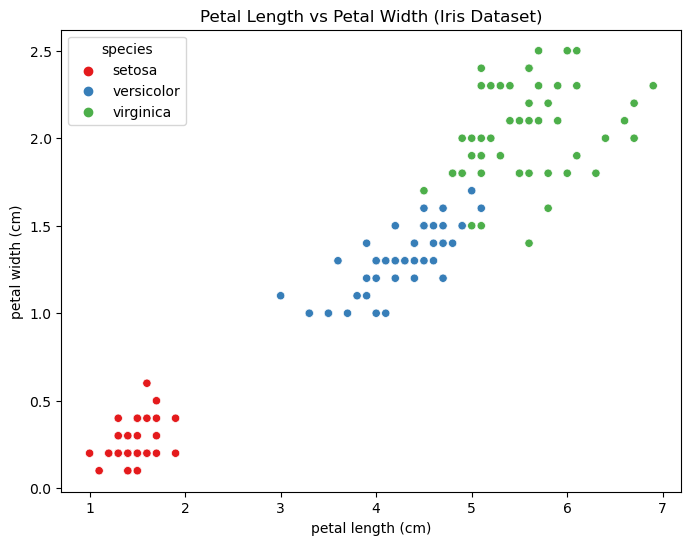

In [11]:
#program 7

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='species', palette='Set1')
plt.title('Petal Length vs Petal Width (Iris Dataset)')
plt.show()


In [12]:
#program 8

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

labels = np.zeros_like(y_kmeans)
for i in range(3):
    mask = (y_kmeans == i)
    labels[mask] = np.bincount(y[mask]).argmax()

print("Confusion Matrix:\n", confusion_matrix(y, labels))
print("\nClassification Report:\n", classification_report(y, labels))


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x75a74dddd620>
Traceback (most recent call last):
  File "/home/ksb/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/ksb/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ksb/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/ksb/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'split

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x75a74052a980>
Traceback (most recent call last):
  File "/home/ksb/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/ksb/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ksb/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/ksb/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'split

Confusion Matrix:
 [[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.77      0.96      0.86        50
           2       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



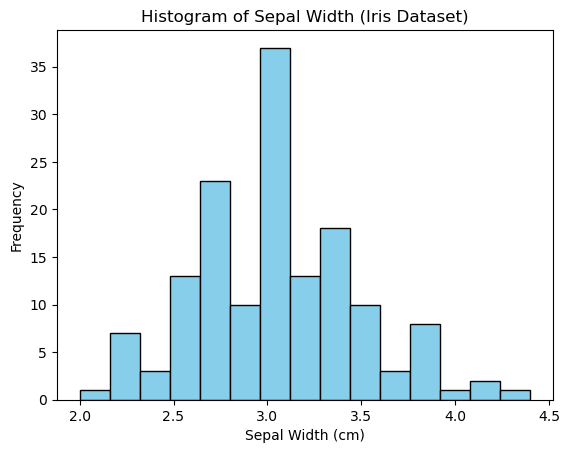

In [13]:
#program 9

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

plt.hist(df['sepal width (cm)'], bins=15, color='skyblue', edgecolor='black')
plt.title('Histogram of Sepal Width (Iris Dataset)')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')
plt.show()


In [14]:
#program 10

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Generate synthetic dataset
np.random.seed(42)
n_samples = 1000
n_features = 17

X = np.random.rand(n_samples, n_features)  # features between 0 and 1
risk = np.random.choice([0, 1], size=n_samples)  # binary target: 0 = safe, 1 = risky

columns = [f'feature_{i+1}' for i in range(n_features)]

df = pd.DataFrame(X, columns=columns)
df['risk'] = risk

# Split data
X_train, X_test, y_train, y_test = train_test_split(df[columns], df['risk'], test_size=0.3, random_state=42)

# Train Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict & Evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.49666666666666665

Confusion Matrix:
 [[69 71]
 [80 80]]

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.49      0.48       140
           1       0.53      0.50      0.51       160

    accuracy                           0.50       300
   macro avg       0.50      0.50      0.50       300
weighted avg       0.50      0.50      0.50       300



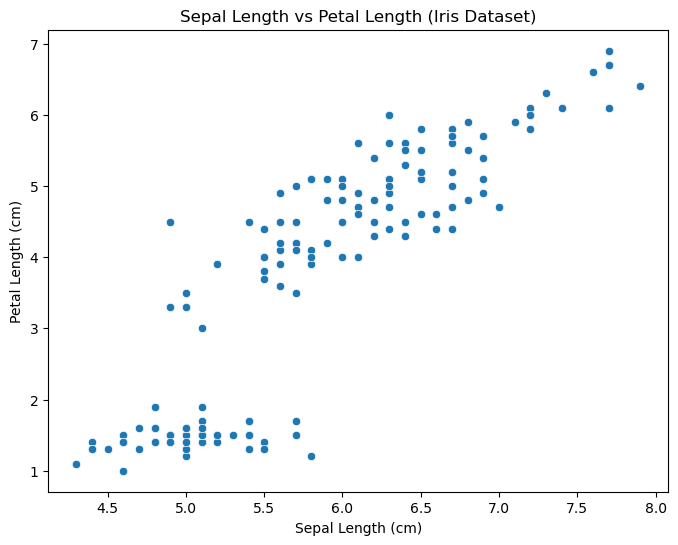

In [15]:
#program 11

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)

plt.figure(figsize=(8,6))
sns.scatterplot(x=df_iris['sepal length (cm)'], y=df_iris['petal length (cm)'])
plt.title('Sepal Length vs Petal Length (Iris Dataset)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.show()


In [16]:
#program 12

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

np.random.seed(42)
n = 498

biking = np.random.uniform(0, 100, n)      # % biking to town
smoking = np.random.uniform(0, 100, n)     # % smoking

# Create synthetic heart disease % with some relation + noise
heart_disease = 0.3 * biking + 0.5 * smoking + np.random.normal(0, 10, n)

df = pd.DataFrame({
    'biking': biking,
    'smoking': smoking,
    'heart_disease': heart_disease
})

X = df[['biking', 'smoking']]
y = df['heart_disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


Coefficients: [0.32214628 0.4971194 ]
Intercept: -0.018421224926960633
Mean Squared Error: 92.66357050366949
R^2 Score: 0.7613796887999563


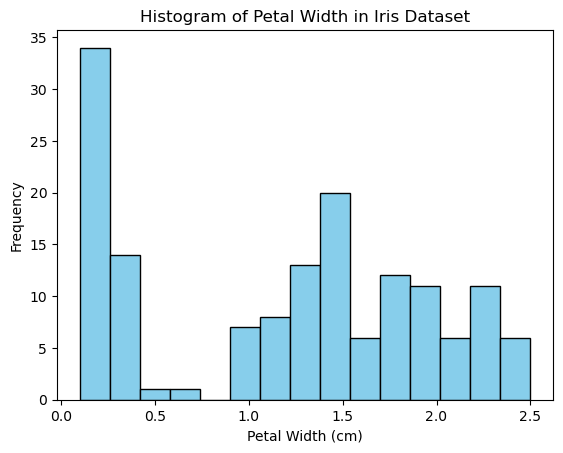

In [17]:
#program 13

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)

plt.hist(df_iris['petal width (cm)'], bins=15, color='skyblue', edgecolor='black')
plt.title('Histogram of Petal Width in Iris Dataset')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Frequency')
plt.show()


In [18]:
#program 14

import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
data = pd.read_csv('food.csv')

# Prepare features and target
X = data[['sweetness', 'crunchiness']]
y = data['food_type']

# Create and train the model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

# Predict for tomato
tomato_features = [[6, 4]]
prediction = knn.predict(tomato_features)

print(f"Predicted food type for tomato: {prediction[0]}")


FileNotFoundError: [Errno 2] No such file or directory: 'food.csv'